## Problem statement:

#### Overview:
- There are over 4,000 agriculture markets (commonly known as mandis) in the country.
- Everyday prices fluctuate in the markets basis supply and demand of the crop.
- Prediction of crop prices is one of the most important task to ensure efficient crop planning
  and food safety in the country.
- The problem statement revolves around prediction of prices for the crop Potato in District
- “Agra” in the state of Uttar Pradesh across year 2020.

### NOTE: I have mentioned the steps to do a time series model and I did a complete Regression model at the end of the file. Please check the script in depth.

In [157]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [158]:
#Read the data
data=pd.read_csv('Agmarknet_Price_Report.csv',skiprows=1,header=0)
data.head()

Sl no. District Name Market Name Commodity Variety Grade  \
0       1          Agra     Achnera    Potato    Desi   FAQ   
1       2          Agra     Achnera    Potato    Desi   FAQ   
2       3          Agra     Achnera    Potato    Desi   FAQ   
3       4          Agra     Achnera    Potato    Desi   FAQ   
4       5          Agra     Achnera    Potato    Desi   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      900                     1000   
1                      800                      900   
2                      850                      950   
3                      800                      900   
4                      800                      900   

   Modal Price (Rs./Quintal) Price Date  
0                        950  30-Dec-20  
1                        850  29-Dec-20  
2                        900  28-Dec-20  
3                        850  27-Dec-20  
4                        850  26-Dec-20

In [159]:
data.shape

(1827, 10)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl no.                     1827 non-null   int64 
 1   District Name              1827 non-null   object
 2   Market Name                1827 non-null   object
 3   Commodity                  1827 non-null   object
 4   Variety                    1827 non-null   object
 5   Grade                      1827 non-null   object
 6   Min Price (Rs./Quintal)    1827 non-null   int64 
 7   Max Price (Rs./Quintal)    1827 non-null   int64 
 8   Modal Price (Rs./Quintal)  1827 non-null   int64 
 9   Price Date                 1827 non-null   object
dtypes: int64(4), object(6)
memory usage: 142.9+ KB


In [161]:
data.describe()

Sl no.  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
count  1827.000000              1827.000000              1827.000000   
mean    914.000000              1392.799672              1521.559934   
std     527.553789               562.382569               577.775389   
min       1.000000                 0.000000                 0.000000   
25%     457.500000              1000.000000              1200.000000   
50%     914.000000              1250.000000              1370.000000   
75%    1370.500000              1690.000000              1810.000000   
max    1827.000000              3750.000000              3850.000000   

       Modal Price (Rs./Quintal)  
count                1827.000000  
mean                 1474.332239  
std                   555.645961  
min                   550.000000  
25%                  1115.000000  
50%                  1310.000000  
75%                  1780.000000  
max                  3800.000000

In [162]:
data.describe(include=object)

District Name Market Name Commodity Variety Grade Price Date
count           1827        1827      1827    1827  1827       1827
unique             1           8         1       4     1        365
top             Agra     Achnera    Potato    Desi   FAQ  03-Mar-20
freq            1827         306      1827    1367  1827          8

## Following are the tasks which need to be done:
    
# a. Write a python script to fetch data of prices for the year 2020 (date wise from 1st Jan’2020 to 31st Dec’2020) for district “Agra” of Uttar Pradesh from the data sources mentioned in the data section (can take point b as a reference)

In [163]:
# Converting the Price Date variable from object type to date type

data['Price Date']=pd.DatetimeIndex(data['Price Date'])

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl no.                     1827 non-null   int64         
 1   District Name              1827 non-null   object        
 2   Market Name                1827 non-null   object        
 3   Commodity                  1827 non-null   object        
 4   Variety                    1827 non-null   object        
 5   Grade                      1827 non-null   object        
 6   Min Price (Rs./Quintal)    1827 non-null   int64         
 7   Max Price (Rs./Quintal)    1827 non-null   int64         
 8   Modal Price (Rs./Quintal)  1827 non-null   int64         
 9   Price Date                 1827 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 142.9+ KB


In [165]:
data[(data['District Name']=='Agra')]

Sl no. District Name Market Name Commodity Variety Grade  \
0          1          Agra     Achnera    Potato    Desi   FAQ   
1          2          Agra     Achnera    Potato    Desi   FAQ   
2          3          Agra     Achnera    Potato    Desi   FAQ   
3          4          Agra     Achnera    Potato    Desi   FAQ   
4          5          Agra     Achnera    Potato    Desi   FAQ   
...      ...           ...         ...       ...     ...   ...   
1822    1823          Agra    Samsabad    Potato   Local   FAQ   
1823    1824          Agra    Samsabad    Potato   Local   FAQ   
1824    1825          Agra    Samsabad    Potato   Local   FAQ   
1825    1826          Agra    Samsabad    Potato   Local   FAQ   
1826    1827          Agra    Samsabad    Potato   Local   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                         900                     1000   
1                         800                      900   
2                         850                      950   
3                         800                      900   
4                         800                      900   
...                       ...                      ...   
1822                     1000                     1200   
1823                     1000                     1200   
1824                     1100                     1300   
1825                     1100                     1300   
1826                     1100                     1300   

      Modal Price (Rs./Quintal) Price Date  
0                           950 2020-12-30  
1                           850 2020-12-29  
2                           900 2020-12-28  
3                           850 2020-12-27  
4                           850 2020-12-26  
...                         ...        ...  
1822                       1100 2020-01-06  
1823                       1100 2020-01-05  
1824                       1200 2020-01-04  
1825                       1200 2020-01-02  
1826                       1200 2020-01-01  

[1827 rows x 10 columns]

# b. Identify major markets for the district “Agra” and plot price patterns for each of them. What patterns do you identify?

In [166]:
data['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
Name: Market Name, dtype: int64

In [167]:
#Average Modal price for potatoes each major market
data.groupby('Market Name')['Modal Price (Rs./Quintal)'].mean()

Market Name
Achnera           1695.212418
Agra              1716.614035
Fatehabad         1385.387597
Fatehpur Sikri    1737.344828
Jagnair           1311.711230
Jarar             1072.671233
Khairagarh        1233.689840
Samsabad          1141.517857
Name: Modal Price (Rs./Quintal), dtype: float64

In [168]:
# Average Price pattern for potatoes across each major market
plt.figure(figsize=(10,7))
data.groupby('Market Name')['Modal Price (Rs./Quintal)'].mean().plot(marker='o')
plt.show()

In [169]:
# Price distribution of potatoes for each major markets
plt.figure(figsize=(12,8))
sns.boxplot(data['Market Name'],data['Modal Price (Rs./Quintal)'],palette='cubehelix')
plt.title('Modal price distribution of potatoes in each Market',fontsize=20)
plt.show()

In [170]:
#Plotting each data point and its distribution 
plt.figure(figsize=(12,8))
sns.stripplot(data['Market Name'],data['Modal Price (Rs./Quintal)'],palette='inferno')
plt.title('Modal price distribution of potatoes in each Market',fontsize=20)
plt.show()

In [171]:
for i in data['Market Name'].value_counts().keys():
    a=data['Modal Price (Rs./Quintal)'][data['Market Name']==i].describe()['std']
    print(f'The standard deviation of modal price in {i} market is ',a)

The standard deviation of modal price in Achnera market is  624.5458971775779
The standard deviation of modal price in Fatehpur Sikri market is  592.992835976849
The standard deviation of modal price in Agra market is  618.7131908068382
The standard deviation of modal price in Fatehabad market is  448.04726005027703
The standard deviation of modal price in Jagnair market is  364.06089534358364
The standard deviation of modal price in Khairagarh market is  394.3672897151659
The standard deviation of modal price in Samsabad market is  222.98382028826825
The standard deviation of modal price in Jarar market is  253.00208829965547


## Observations:

- Agra market records the highest average modal price for potatoes among all the major markets (Potatoes are more expensive in Agra Market).
- Jarar market records the lowest average modal price for potatoes among all the major markets (Potatoes are least expensive in Jarar Market). 
- The modal prices of potatoes in Samsabad and Jarar market varies less and the prices are more constant or fixed throughout the year compared to other markets( As indicated by the standard deviation and the stripplot).
- Achnera market and Agra market have the most varying prices for potatoes.

# c. Comment on how you can leverage machine learning to predict prices for a given market in Agra for the crop “Potato”.

## i. What are the data pre-processing / cleaning techniques you would apply?

- We import the data for the prediction of prices for the crop Potato in District “Agra” in the state of Uttar Pradesh across year 2020 from https://agmarknet.gov.in/ website in excel sheet which is in xls format by default. We convert it to a csv format using 'Save as' in Excel.
- The first row needs cleaning as it does not make any sense. We remove the column using 'skiprows' command and make the second column as the header using header=0 inisde pd.read_csv function.

#### The data pre-processing techniques that are generally used are:

- Missing value anaysis.
- EDA ( Uni-variate and bi-variate analysis of variables using plots and draw useful insights or conclusions along with outlier detection for continuous variables).   
- Statistical test to remove insignificant features( Chi-square test for comapring two categorical variables, Independent t-test for testing one continuous and one categorical varibale(2 levels), ANOVA for testing one continous and one categorical variable( if the categorical variable more than 2 levels) and correlation matrix for 2 continuous variables .
- Scaling the data( using minmaxscaler() or standardscaler()).
- Dummy encoding (especially for regression models like linear regression and logistic regression) or Label encoding.
- Multicollinearity test using VIF factor.
- SMOTE or resampling if necessary (when the target variable is highly unbalanced).
- Feature selection using RFE.
- PCA, if necessary, to eliminate the multicolinearity introduced by one hot encoding.    

#### BUT THIS DATASET IS SUITABLE FOR TIME SERIES ANALYSIS AS MOST OF THE FEATURES ARE NOT USEFUL SO WE CANT BUILT A GOOD MODEL WITH SUPERVISED ML ALGORITHMS.  ALSO WE HAVE DAILY SALES AND  DATE VARIABLE.

## ii. What are the features you would use to create the model?

In [172]:
data.describe()

Sl no.  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
count  1827.000000              1827.000000              1827.000000   
mean    914.000000              1392.799672              1521.559934   
std     527.553789               562.382569               577.775389   
min       1.000000                 0.000000                 0.000000   
25%     457.500000              1000.000000              1200.000000   
50%     914.000000              1250.000000              1370.000000   
75%    1370.500000              1690.000000              1810.000000   
max    1827.000000              3750.000000              3850.000000   

       Modal Price (Rs./Quintal)  
count                1827.000000  
mean                 1474.332239  
std                   555.645961  
min                   550.000000  
25%                  1115.000000  
50%                  1310.000000  
75%                  1780.000000  
max                  3800.000000

In [173]:
data.describe(include=object)

District Name Market Name Commodity Variety Grade
count           1827        1827      1827    1827  1827
unique             1           8         1       4     1
top             Agra     Achnera    Potato    Desi   FAQ
freq            1827         306      1827    1367  1827

In [174]:
data.drop(['Sl no.','District Name','Commodity','Grade','Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'],axis=1,inplace=True)

- We drop the 'Sl.no' feature (As it has only unique values and it doesnt help with our prediction).
- We drop the 'District Name','Commodity','Grade' features as they have only one unique value inside them.
- We drop 'Min Price (Rs./Quintal)' and 'Max Price (Rs./Quintal)' as it it highly correlated with the 'Modal Price (Rs./Quintal)' which is effectively the Average between them. Using the average price makes more sense.

#### Since its time seris analysis,we use 'Modal Price (Rs./Quintal)' and 'Price Date' for our prediction

## iii. How would you frame this problem as a machine learning problem? What would be the target variable?

- We are trying to predict a continuous value (price of potatoes) with data from the past. 
- The action of predicting future values using previously observed values is called Time series forecasting. 
- Time series forecasting is an important area of machine learning because there are so many prediction problems that involve a time component.
*'Modal Price (Rs./Quintal)' would be the variable we are trying to forecast or predict (Target variable)*

In [175]:
data.drop(['Market Name','Variety'],axis=1,inplace=True)

In [176]:
data = data.sort_values(by='Price Date')
data.head(10)

Modal Price (Rs./Quintal) Price Date
1826                       1200 2020-01-01
305                        1350 2020-01-01
1325                       1300 2020-01-01
1658                       1250 2020-01-01
1138                       1455 2020-01-01
1471                       1250 2020-01-01
1470                       1250 2020-01-02
590                        1400 2020-01-02
1324                       1300 2020-01-02
1657                       1250 2020-01-02

In [177]:
data.index = pd.PeriodIndex(data['Price Date'], freq="d")
data.head(20)

Modal Price (Rs./Quintal) Price Date
Price Date                                      
2020-01-01                       1200 2020-01-01
2020-01-01                       1350 2020-01-01
2020-01-01                       1300 2020-01-01
2020-01-01                       1250 2020-01-01
2020-01-01                       1455 2020-01-01
2020-01-01                       1250 2020-01-01
2020-01-02                       1250 2020-01-02
2020-01-02                       1400 2020-01-02
2020-01-02                       1300 2020-01-02
2020-01-02                       1250 2020-01-02
2020-01-02                       1420 2020-01-02
2020-01-02                       1200 2020-01-02
2020-01-02                       1200 2020-01-02
2020-01-03                       1380 2020-01-03
2020-01-03                       1150 2020-01-03
2020-01-03                       1275 2020-01-03
2020-01-03                       1435 2020-01-03
2020-01-03                       1350 2020-01-03
2020-01-03                       1240 2020-01-03
2020-01-03                       1200 2020-01-03

In [178]:
data.drop('Price Date',axis=1,inplace=True)

In [179]:
data.describe()

Modal Price (Rs./Quintal)
count                1827.000000
mean                 1474.332239
std                   555.645961
min                   550.000000
25%                  1115.000000
50%                  1310.000000
75%                  1780.000000
max                  3800.000000

<Figure size 1080x720 with 0 Axes>

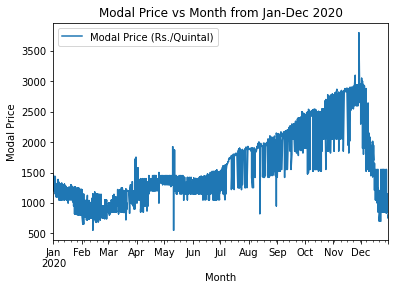

In [180]:
plt.figure(figsize=(15,10))
data.plot()
plt.title('Modal Price vs Month from Jan-Dec 2020')
plt.ylabel('Modal Price')
plt.xlabel('Month')
plt.show()

In [181]:
data1=data.groupby('Price Date').agg({'Modal Price (Rs./Quintal)':'sum'})
data1.head()

Modal Price (Rs./Quintal)
Price Date                           
2020-01-01                       7805
2020-01-02                       9020
2020-01-03                       9030
2020-01-04                       7360
2020-01-05                       6120

In [182]:
data1.shape

(365, 1)

Text(0.5, 1.0, 'Density plot of Modal Price Data')

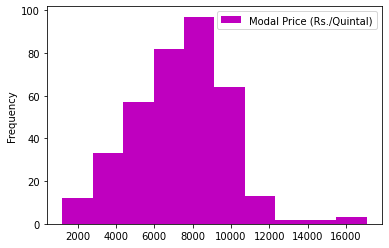

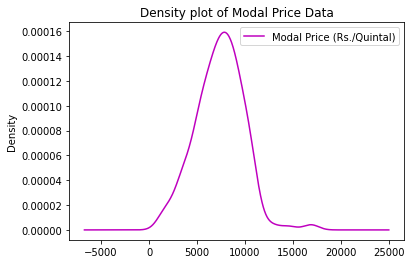

In [183]:
data1.plot(kind='hist',color='m')
data1.plot(kind='kde',color='m')
plt.title('Density plot of Modal Price Data')

<AxesSubplot:>

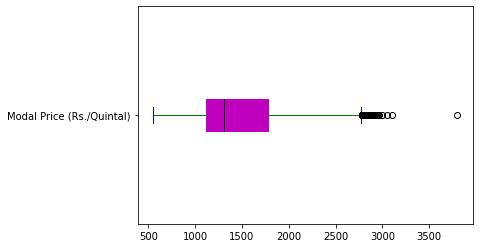

In [184]:
props2=dict(boxes='m',whiskers='green',medians='black',caps='blue')

data.plot.box(color=props2,patch_artist=True,vert=False)

In [185]:
#Test for stationarity
#USING ADF TEST
from statsmodels.tsa.stattools import adfuller
price_adf=adfuller(data1)
print('ADF Statistic: %f' % price_adf[0])
print('p-value: %f' % price_adf[1])
print('Critical Values:')
for key, value in price_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.601387
p-value: 0.092711
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


##### Since p value is greater than 0.05, we accept the Null hypothesis, the data is not stationary. Wemust make the data stationary.

## iv. Which algorithm would you use for price prediction?

- Classical methods like ETS and ARIMA out-perform machine learning and deep learning methods for one-step forecasting on univariate datasets.
- Machine learning and deep learning methods do not yet deliver on their promise for univariate time series forecasting, and there is much work to do.
- We will try Auto-ARIMA 

## v. What would be the loss function you would use?

- RMSE or MSE would be our loss function. The lower the value of MSE, the better is our prediction.

## vi. Any other comments you want to add?

##### We can also do Linear Regression or Logistic Regression on this data but the number of features would be less. I will give a step-wise procedure on how to do it.
- 'Modal Price (Rs./Quintal)' would be our Traget variable.
- We can do our Analysis with four variables: 'Market Name', 'Variety', 'Month', 'Day' ('Month', 'Day' is extracted from the 'Price Date' variable).
- We make dummy variables and the number of features increases.
- run statistical tests.
- Test mutlicollinearity
- PCA to eliminate multicollinearity
- Then we build model on it.
- I have built the model

In [186]:
#Read the data
data=pd.read_csv('Agmarknet_Price_Report.csv',skiprows=1,header=0)
data.head()

Sl no. District Name Market Name Commodity Variety Grade  \
0       1          Agra     Achnera    Potato    Desi   FAQ   
1       2          Agra     Achnera    Potato    Desi   FAQ   
2       3          Agra     Achnera    Potato    Desi   FAQ   
3       4          Agra     Achnera    Potato    Desi   FAQ   
4       5          Agra     Achnera    Potato    Desi   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      900                     1000   
1                      800                      900   
2                      850                      950   
3                      800                      900   
4                      800                      900   

   Modal Price (Rs./Quintal) Price Date  
0                        950  30-Dec-20  
1                        850  29-Dec-20  
2                        900  28-Dec-20  
3                        850  27-Dec-20  
4                        850  26-Dec-20

In [187]:
data.drop(['Sl no.','District Name','Commodity','Grade','Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'],axis=1,inplace=True)

In [188]:
data['Price Date']=pd.to_datetime(data['Price Date'])
data['Month']=data['Price Date'].dt.month_name()
data['Day']=data['Price Date'].dt.day_name()

In [189]:
data.drop('Price Date',axis=1,inplace=True)

In [190]:
print(data.shape)
data.head()

(1827, 5)


Market Name Variety  Modal Price (Rs./Quintal)     Month        Day
0     Achnera    Desi                        950  December  Wednesday
1     Achnera    Desi                        850  December    Tuesday
2     Achnera    Desi                        900  December     Monday
3     Achnera    Desi                        850  December     Sunday
4     Achnera    Desi                        850  December   Saturday

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Market Name                1827 non-null   object
 1   Variety                    1827 non-null   object
 2   Modal Price (Rs./Quintal)  1827 non-null   int64 
 3   Month                      1827 non-null   object
 4   Day                        1827 non-null   object
dtypes: int64(1), object(4)
memory usage: 71.5+ KB


In [192]:
numerical=data.select_dtypes(include=np.number)
categorical=data.select_dtypes(include=object)
categorical=pd.get_dummies(categorical,drop_first=True)
data1=pd.concat([numerical,categorical],axis=1)
print(data1.shape)
data1.head()

(1827, 28)


Modal Price (Rs./Quintal)  Market Name_Agra  Market Name_Fatehabad  \
0                        950                 0                      0   
1                        850                 0                      0   
2                        900                 0                      0   
3                        850                 0                      0   
4                        850                 0                      0   

   Market Name_Fatehpur Sikri  Market Name_Jagnair  Market Name_Jarar  \
0                           0                    0                  0   
1                           0                    0                  0   
2                           0                    0                  0   
3                           0                    0                  0   
4                           0                    0                  0   

   Market Name_Khairagarh  Market Name_Samsabad  Variety_Local  Variety_Other  \
0                       0                     0              0              0   
1                       0                     0              0              0   
2                       0                     0              0              0   
3                       0                     0              0              0   
4                       0                     0              0              0   

   Variety_Potato  Month_August  Month_December  Month_February  \
0               0             0               1               0   
1               0             0               1               0   
2               0             0               1               0   
3               0             0               1               0   
4               0             0               1               0   

   Month_January  Month_July  Month_June  Month_March  Month_May  \
0              0           0           0            0          0   
1              0           0           0            0          0   
2              0           0           0            0          0   
3              0           0           0            0          0   
4              0           0           0            0          0   

   Month_November  Month_October  Month_September  Day_Monday  Day_Saturday  \
0               0              0                0           0             0   
1               0              0                0           0             0   
2               0              0                0           1             0   
3               0              0                0           0             0   
4               0              0                0           0             1   

   Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday  
0           0             0            0              1  
1           0             0            1              0  
2           0             0            0              0  
3           1             0            0              0  
4           0             0            0              0

In [193]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Modal Price (Rs./Quintal)   1827 non-null   int64
 1   Market Name_Agra            1827 non-null   uint8
 2   Market Name_Fatehabad       1827 non-null   uint8
 3   Market Name_Fatehpur Sikri  1827 non-null   uint8
 4   Market Name_Jagnair         1827 non-null   uint8
 5   Market Name_Jarar           1827 non-null   uint8
 6   Market Name_Khairagarh      1827 non-null   uint8
 7   Market Name_Samsabad        1827 non-null   uint8
 8   Variety_Local               1827 non-null   uint8
 9   Variety_Other               1827 non-null   uint8
 10  Variety_Potato              1827 non-null   uint8
 11  Month_August                1827 non-null   uint8
 12  Month_December              1827 non-null   uint8
 13  Month_February              1827 non-null   uint8
 14  Month_Ja

### Testing multicolinearity

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numerical=data1.drop('Modal Price (Rs./Quintal)',axis=1)
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
vif["Features"] = df_numerical.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                    Features
0          inf  Market Name_Fatehpur Sikri
1          inf        Market Name_Samsabad
2          inf               Variety_Local
3     1.716840                Day_Thursday
4     1.564923                  Month_June
5     1.559850                   Month_May
6     1.554030               Month_January
7     1.527164              Month_February
8     1.492408      Market Name_Khairagarh
9     1.468050         Market Name_Jagnair
10    1.453372                 Month_March
11    1.447475              Month_December
12    1.426676                  Day_Sunday
13    1.385615           Market Name_Jarar
14    1.328180               Month_October
15    1.305205             Month_September
16    1.287911              Month_November
17    1.272744                  Month_July
18    1.260588                Month_August
19    1.017479               Variety_Other
20    1.016841              Variety_Potato
21    0.234134               Day_Wednesday
22    0.219965                  Day_Monday
23    0.203646                 Day_Tuesday
24    0.175553            Market Name_Agra
25    0.056652                Day_Saturday
26    0.013092       Market Name_Fatehabad

### PCA: As One Hot Encoding introduces some multicollinearity we will use PCA to eliminate it

In [195]:
#Finding the highly correlated features in the data after dummy encoding
correlated_features = []
correlation_matrix = data1.drop(['Modal Price (Rs./Quintal)'], axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
correlated_features 

[]

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [197]:
col_list=data1.drop('Modal Price (Rs./Quintal)',axis=1).columns.to_list()
print(len(col_list))
col_list

27


['Market Name_Agra',
 'Market Name_Fatehabad',
 'Market Name_Fatehpur Sikri',
 'Market Name_Jagnair',
 'Market Name_Jarar',
 'Market Name_Khairagarh',
 'Market Name_Samsabad',
 'Variety_Local',
 'Variety_Other',
 'Variety_Potato',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Day_Monday',
 'Day_Saturday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday']

In [198]:
sc=StandardScaler()
x= data1[col_list].values
x=sc.fit_transform(x)
data2=PCA(n_components=27)
data2.fit(x)

PCA(n_components=27)

In [199]:
#The amount of variance that each PC explains
var=data2.explained_variance_ratio_
var

array([7.96744809e-02, 5.87044809e-02, 4.80773329e-02, 4.75462130e-02,
       4.56390175e-02, 4.51489283e-02, 4.44774526e-02, 4.41767743e-02,
       4.38719844e-02, 4.15548260e-02, 4.13976385e-02, 4.12462749e-02,
       4.10403340e-02, 4.00815233e-02, 3.97604322e-02, 3.91156774e-02,
       3.88346121e-02, 3.78932618e-02, 3.62060604e-02, 3.55735499e-02,
       3.39377985e-02, 3.32064604e-02, 2.45106321e-02, 7.73332956e-03,
       6.34134377e-03, 4.24958040e-03, 1.28674969e-30])

In [200]:
#Cumulative Variance explains
var1=np.cumsum(np.round(data2.explained_variance_ratio_, decimals=4)*100)
var1
plt.plot(var1)
plt.show()

In [201]:
var1

array([ 7.97, 13.84, 18.65, 23.4 , 27.96, 32.47, 36.92, 41.34, 45.73,
       49.89, 54.03, 58.15, 62.25, 66.26, 70.24, 74.15, 78.03, 81.82,
       85.44, 89.  , 92.39, 95.71, 98.16, 98.93, 99.56, 99.98, 99.98])

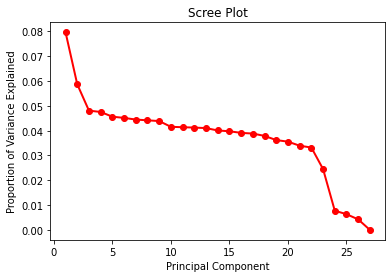

In [202]:
PC_values = np.arange(data2.n_components_) + 1
plt.plot(PC_values, data2.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [203]:
#Looking at above plot I'm taking 22 variables
pca = PCA(n_components=22)
pca.fit(x)
x1=pca.fit_transform(x)
print(x1)

[[-6.66591367e-01  3.46106216e-01  2.06527095e+00 ... -9.66108757e-01
   6.47507024e-03  1.89159562e+00]
 [-7.70404120e-01  3.33492768e-01  1.42814907e+00 ... -1.29316403e+00
   5.28949404e-02  1.88912524e+00]
 [-7.12111125e-01  4.43662833e-01  1.27076387e+00 ... -1.37004635e+00
   1.62470806e-01  1.82710729e+00]
 ...
 [ 2.31551224e+00 -1.53596288e+00  3.04850227e-02 ... -5.68404244e-01
  -2.34751455e-01  9.02529416e-01]
 [ 2.29011223e+00 -1.88500595e+00 -7.29973418e-04 ... -2.69839603e-02
   5.15958117e-01  3.36753172e-01]
 [ 2.23908083e+00 -1.91238934e+00  1.04909011e-01 ...  2.62535388e-01
  -1.24122175e-02  6.63417187e-01]]


In [204]:
x1=pd.DataFrame(x1)
x1.shape

(1827, 22)

## MODEL

In [205]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse

In [206]:
y=data1['Modal Price (Rs./Quintal)']

In [207]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,train_size=0.7,random_state=100)

In [210]:
linear_model = sm.OLS(ytrain, xtrain).fit()

# print the summary output
print(linear_model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Modal Price (Rs./Quintal)   R-squared (uncentered):                   0.091
Model:                                   OLS   Adj. R-squared (uncentered):              0.075
Method:                        Least Squares   F-statistic:                              5.689
Date:                       Sun, 28 Nov 2021   Prob (F-statistic):                    1.57e-15
Time:                               15:46:18   Log-Likelihood:                         -11155.
No. Observations:                       1278   AIC:                                  2.235e+04
Df Residuals:                           1256   BIC:                                  2.247e+04
Df Model:                                 22                                                  
Covariance Type:                   nonrobust                                                  
                 coef    std err          t      P

In [213]:
RMSE = rmse(ytest, linear_model.predict(xtest))
RMSE

3183.8418517539367

In [ ]:
linreg_rsquared = linear_model.rsquared
linreg_rsquared